In [83]:
#importing necesseary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [27]:
#reading login data as dataframe
df_login=pd.read_json("logins.json")

In [28]:
df_login.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [29]:
df_login.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


The data is sorted by data for the period starting from 1st January 1970 to 13th April 1970.

Let's confirm datatypes for the entries. They should be timestamps.

In [30]:
#confirming datatype of entries
df_login.dtypes

login_time    datetime64[ns]
dtype: object

# PART 1 - EDA

Let's set the index equal to the login time.

In [37]:
df_login_2=df_login.set_index('login_time')
df_login_2['counter']=1

Let's resample the data for every 15 minutes while using count as the aggregator.

In [40]:
#resmapling the data such that for every 15 minute od data, the number of entries are counted
login_15min=df_login_2.resample('15Min').count()

Let's have a look at the results 

In [43]:
login_15min.head()

,counter
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Now that the results are aggregated for every 15minytes, in order to find the daily demand, let's group by time of day and aggregate the average.

In [59]:
#extracting and storing the time of day from the datetime index
login_15min['time']=login_15min.index.time

In [62]:
#grouping the data for 15 minute intervals independant of the day
daily_15min_mean=login_15min.groupby('time').mean()

In [66]:
daily_15min_mean.head()

,counter
time,
00:00:00,14.107843
00:15:00,15.166667
00:30:00,14.950980
00:45:00,14.529412
01:00:00,15.186275


As can be seen, the index is now only time with no date and is for 15 minute intervals.

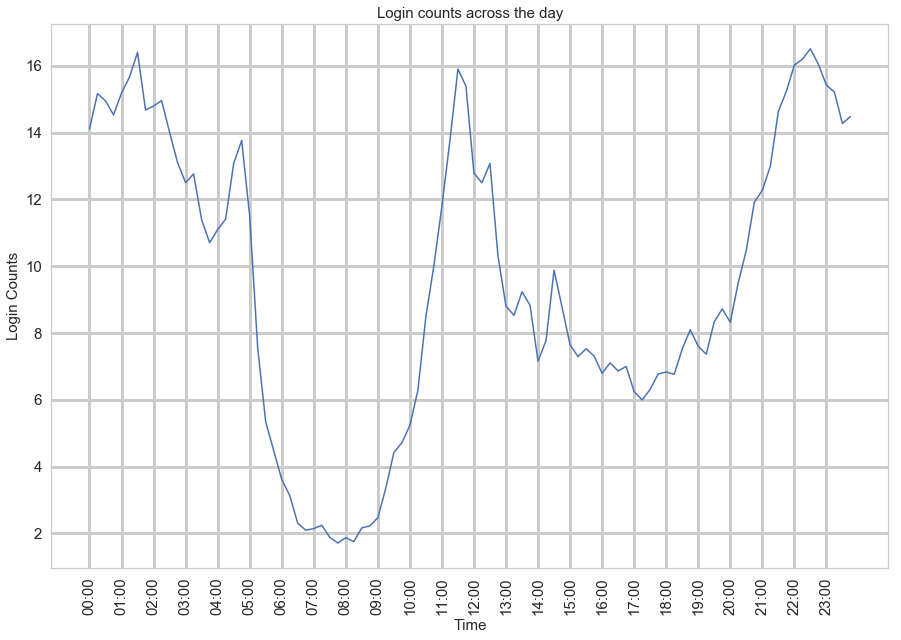

In [145]:
sns.set(style="whitegrid")

plt.figure(figsize=[15,10])
plt.plot(daily_15min_mean)

plt.title("Login counts across the day",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Login Counts", size=15)

plt.grid(which='both', lw=3)

plt.yticks(size=15)
plt.xticks(daily_15min_mean.index[::4],size=15, rotation=90);

As we can see:

- 6:30am-9:30am: Lowest period of activity of the day - This is when people are getting ready for work and are about to head into tush hour.
- 9:30am-11:30am - Activity satrts to increase rapidly from 9:30am and peaks at 11:30am - All the morning commuters
- 11:30am - 5:30pm - Activitiy slowly decreases from 11:30am to 5:30pm.
- 5:30pm -10:30pm: Activity rapidly increases and peaks at 10:30pm as people want leisure venues (Restaurants/clubs/bars)
- 10:30pm - 11:30pm: A minor decline in activity as people enjoy their outings.
- 11:30pm -1:30am: Another spike in activity as people eng their night and go home.
- 1:30am -6:30am: Rapid decrease with a sudden spike at 3:30am-4:30am but continuing to decrease to the days lows at 6:30am.

In Summary there are:
1. 3 equal peaks in a day
2. 2 unequal lows in a day

,counter
login_time,
0,8823
1,9268
2,10339
3,11960
4,15208
5,19377
6,18167


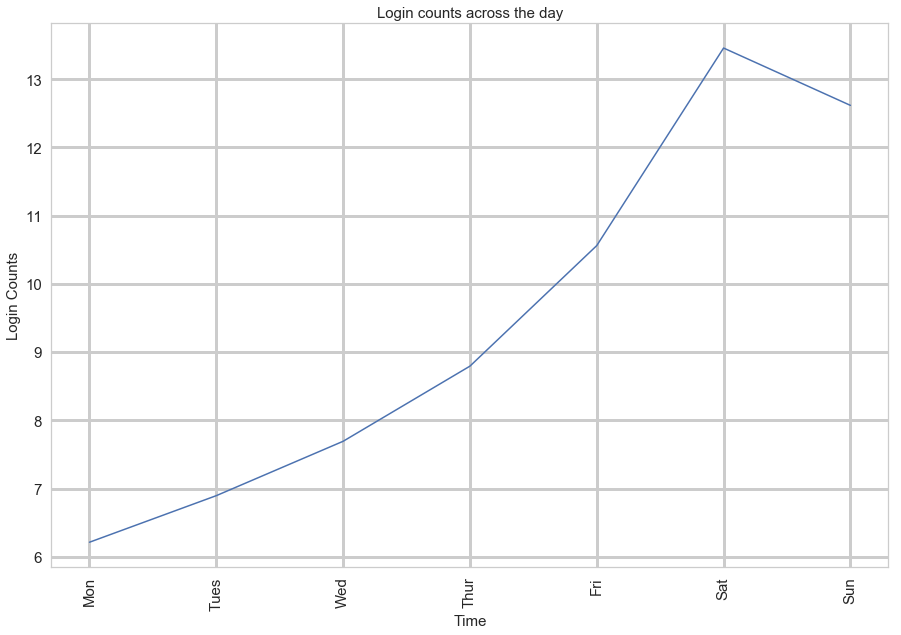

In [173]:
sns.set(style="whitegrid")

plt.figure(figsize=[15,10])
plt.plot(login_15min.groupby(login_15min.index.dayofweek).mean())

plt.title("Login counts across the day",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Login Counts", size=15)

plt.grid(which='both', lw=3)

daysofweek=['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
plt.yticks(size=15)
plt.xticks([0,1,2,3,4,5,6],labels=daysofweek, size=15, rotation=90);

The following observations can be made:
1. We see a gradual increase in average activity per day from Monday to a peak on Saturday.
2. Activity slightly slows down from Sat to Sunday.
3. Activity plummets from Sunday to a low of the week on Monday.

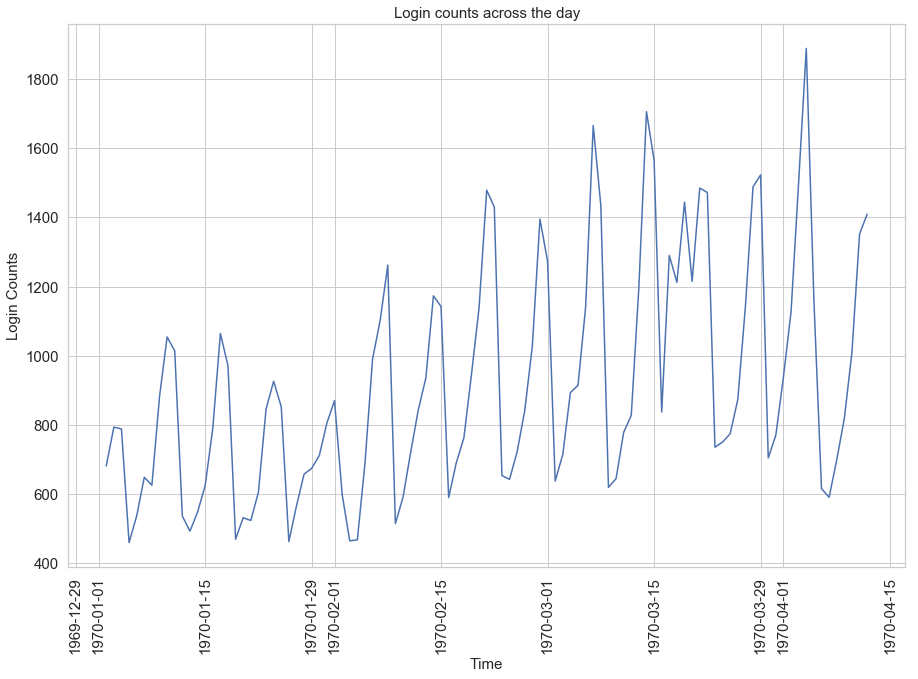

In [150]:
plt.figure(figsize=[15,10])
plt.plot(login_15min.resample("D").sum()[1:-1])

plt.title("Login counts across the day",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Login Counts", size=15)


plt.yticks(size=15)
plt.xticks(size=15, rotation=90);

# Part 2: EXPERIMENTS AND METRICS DESIGN

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

##### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

##### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

# PART 3: PREDICTIVE MODELING